# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json 

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 610


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pacific grove
Processing Record 2 of Set 1 | codrington
Processing Record 3 of Set 1 | boyalik
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | uturoa
Processing Record 6 of Set 1 | port mathurin
Processing Record 7 of Set 1 | bethel
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | coruripe
Processing Record 10 of Set 1 | bardai
Processing Record 11 of Set 1 | magadan
Processing Record 12 of Set 1 | kerikeri
Processing Record 13 of Set 1 | taiohae
City not found. Skipping...
Processing Record 14 of Set 1 | dudinka
Processing Record 15 of Set 1 | emmett
Processing Record 16 of Set 1 | bel ombre
Processing Record 17 of Set 1 | puerto natales
Processing Record 18 of Set 1 | st. john's
Processing Record 19 of Set 1 | grytviken
Processing Record 20 of Set 1 | abashiri
Processing Record 21 of Set 1 | kudymkar
Processing Record 22 of Set 1 | hammerfest

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pacific grove,36.6177,-121.9166,24.14,84,39,2.24,US,1723075290
1,codrington,-38.2667,141.9667,11.95,65,100,9.83,AU,1723075292
2,boyalik,41.2634,28.6314,21.51,76,0,2.95,TR,1723075293
3,ushuaia,-54.8000,-68.3000,0.81,75,0,1.54,AR,1723075294
4,uturoa,-16.7333,-151.4333,26.14,80,16,4.88,PF,1723075295


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pacific grove,36.6177,-121.9166,24.14,84,39,2.24,US,1723075290
1,codrington,-38.2667,141.9667,11.95,65,100,9.83,AU,1723075292
2,boyalik,41.2634,28.6314,21.51,76,0,2.95,TR,1723075293
3,ushuaia,-54.8000,-68.3000,0.81,75,0,1.54,AR,1723075294
4,uturoa,-16.7333,-151.4333,26.14,80,16,4.88,PF,1723075295


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

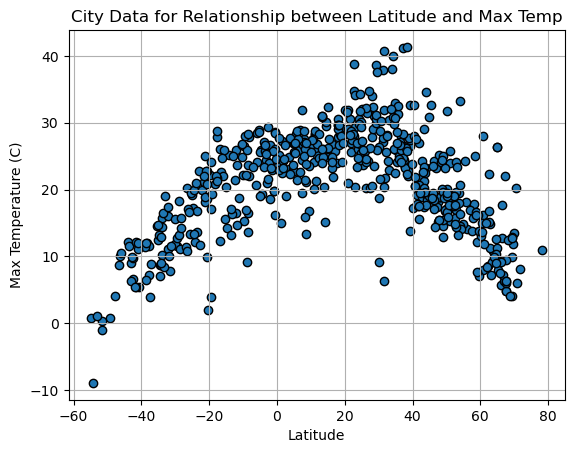

In [8]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor='black')
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Data for Relationship between Latitude and Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

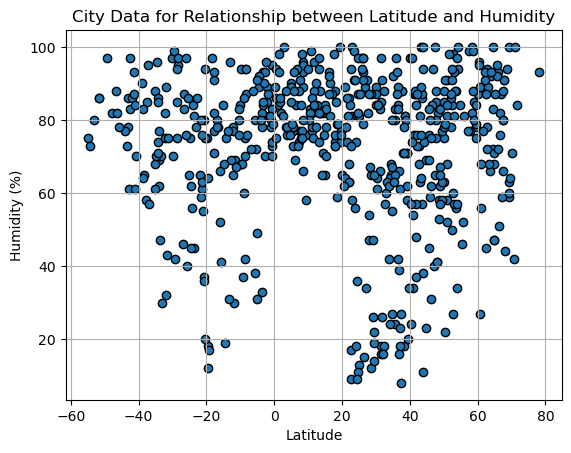

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor='black')

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Data for Relationship between Latitude and Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

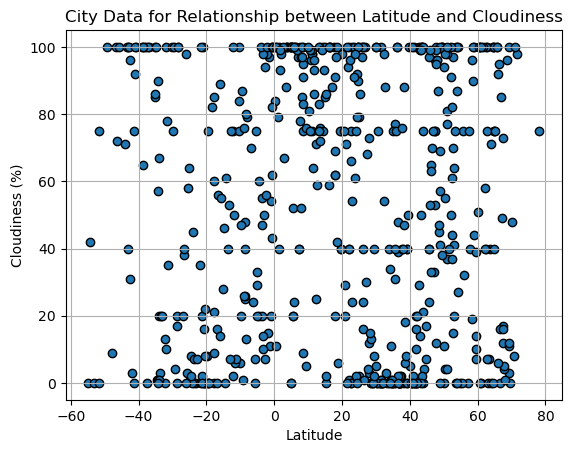

In [10]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor='black')
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Data for Relationship between Latitude and Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

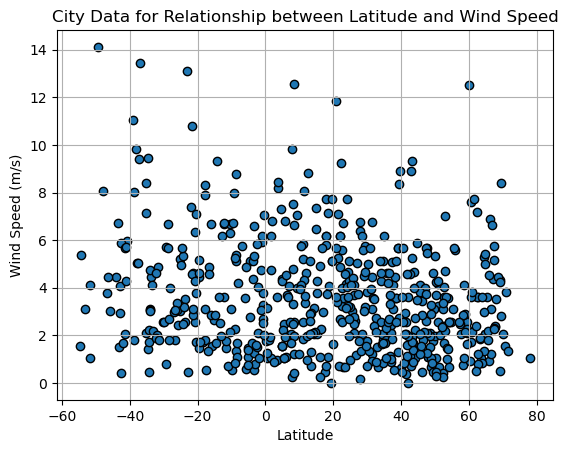

In [11]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor='black')
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Data for Relationship between Latitude and Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pacific grove,36.6177,-121.9166,24.14,84,39,2.24,US,1723075290
2,boyalik,41.2634,28.6314,21.51,76,0,2.95,TR,1723075293
6,bethel,41.3712,-73.4140,19.24,87,100,2.06,US,1723075298
9,bardai,11.6500,7.2333,21.33,96,86,3.36,NG,1723075301
10,magadan,59.5667,150.8000,13.75,78,10,2.56,RU,1723075302


In [13]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]<0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,codrington,-38.2667,141.9667,11.95,65,100,9.83,AU,1723075292
3,ushuaia,-54.8000,-68.3000,0.81,75,0,1.54,AR,1723075294
4,uturoa,-16.7333,-151.4333,26.14,80,16,4.88,PF,1723075295
5,port mathurin,-19.6833,63.4167,22.23,75,8,5.17,MU,1723075296
7,port-aux-francais,-49.3500,70.2167,0.69,97,100,14.12,TF,1723075299


###  Temperature vs. Latitude Linear Regression Plot

The r^2 value is: 0.38505275498237485


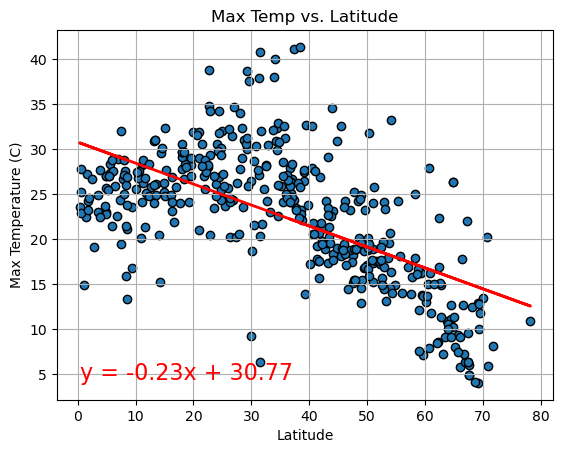

In [22]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
regress_value = (northern_hemi_df["Lat"]) * slope + intercept
r_squared = rvalue ** 2
print(f"The r^2 value is: {r_squared}")
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], edgecolor="black")
plt.plot(northern_hemi_df["Lat"], regress_value, color="red", linewidth=2)
line_eq = (f"y = {round(slope, 2)}x + {round(intercept, 2)}")
plt.text(min(northern_hemi_df["Lat"]) * 1.1, min(northern_hemi_df["Max Temp"]) * 1.1, line_eq, fontsize=16, color="red")
plt.title("Max Temp vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()
plt.show()

The r^2 value is: 0.6540126501966472


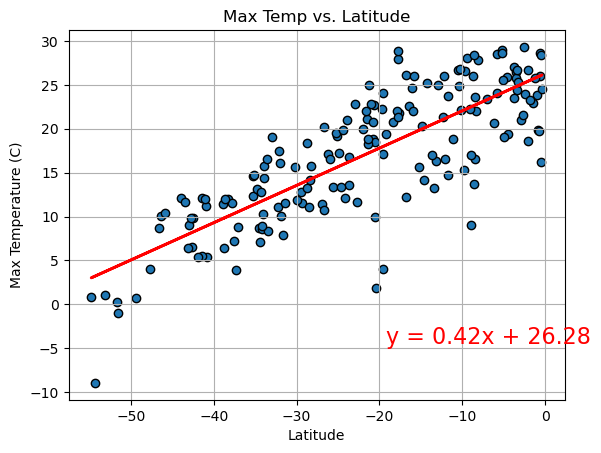

In [37]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
regress_value = (southern_hemi_df["Lat"] * slope + intercept)
plt.plot(southern_hemi_df["Lat"], regress_value, color="red", linewidth=2)
r_squared = rvalue ** 2
print(f"The r^2 value is: {r_squared}")   
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], edgecolor="black")
line_eq = (f"y = {round(slope, 2)}x + {round(intercept, 2)}")
plt.text(min(southern_hemi_df["Lat"]) * 0.35, min(southern_hemi_df["Max Temp"]) * 0.5 , line_eq, fontsize=16, color="red")
plt.title("Max Temp vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()
plt.show()

When analyzing the linear relationship, it is evident that a strong correlation exists within the relationship between the city's latitude and the city's maximum temperature. As displayed in the northern hemisphere graph as the latitude increases the max temperature decreases. We understand that the latitude is the coordinate system that runs parallel to the equator starting from 0 at the equator and positively increasing in the northern hemisphere towards the north pole and negatively increasing in the southern hemisphere toward the south pole. In the graph depicting the northern hemisphere, we can see that as the latitude of the city increases, meaning moving farther north the max temperature tends to decrease. All this is saying that as you move farther north the temperature tends to decrease getting colder and colder, which is accurate, the farther north you travel the colder it gets. In the southern hemisphere graph, the opposite is depicted. The coordinates of the latitude start very negative and increase toward zero, as we can see the temperature increases. This is saying that the temperature increases as you move north toward the equator from the south pole, which is consistent with what previous knowledge has taught us. The rsquared coefficient is pretty strong with being a .38 in the north and a .65 in the south. 

### Humidity vs. Latitude Linear Regression Plot

The r^2 value is: 0.007092198738833407


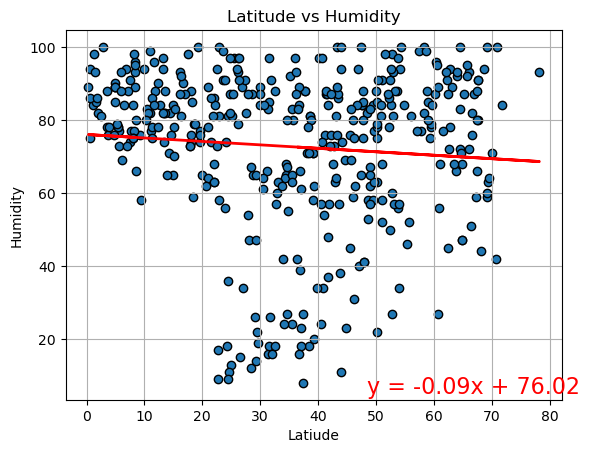

In [40]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
regress_value = (northern_hemi_df["Lat"] * slope + intercept)
plt.plot(northern_hemi_df["Lat"], regress_value, linewidth=2, color="red")
r_squared = rvalue ** 2
print (f"The r^2 value is: {r_squared}")  
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], edgecolor="black")
line_eq = (f"y = {round(slope, 2)}x + {round(intercept, 2)}")
plt.text(max(northern_hemi_df["Lat"]) * 0.62, min(northern_hemi_df["Humidity"]) * 0.62, line_eq, fontsize=16, color="red")
plt.title("Latitude vs Humidity")
plt.xlabel("Latiude")
plt.ylabel("Humidity")
plt.grid()
plt.show()

The r^2 value is: 0.002298687834259808


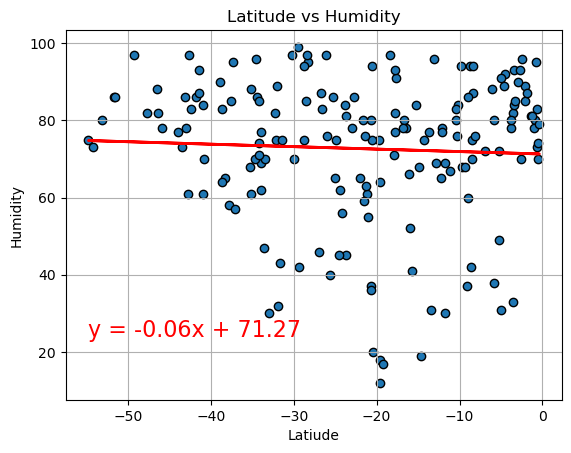

In [51]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
regress_value = (southern_hemi_df["Lat"] * slope + intercept)
plt.plot(southern_hemi_df["Lat"], regress_value, linewidth=2, color="red")
r_squared = rvalue ** 2
print (f"The r^2 value is: {r_squared}")  
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], edgecolor="black")
line_eq = line_eq = (f"y = {round(slope, 2)}x + {round(intercept, 2)}")
plt.text(min(southern_hemi_df["Lat"]) * 1, min(southern_hemi_df["Humidity"]) * 2 , line_eq, fontsize=16, color="red")
plt.title("Latitude vs Humidity")
plt.xlabel("Latiude")
plt.ylabel("Humidity")
plt.grid()
plt.show()

The relationship between humidity and latitude is not nearly as strong between latitude and temperature. The rsqaured coefficient for the northern hemisphere is .007 for the north and .002 for the south, basically saying that the correlation between these two variables is almost nonexistent. In the north it is slightly negative, which also holds for the south, this is likely because many factors influence humidity not just the location of the city on Earth relative to the equator. Unlike the maximum temperature, the humidity is determined by the city's location in relation to the beach, its altitude, and weather patterns, not just how far north or south the city is located. If there is a relationship at all of notice it does seem that the humidity does increase the closer you get to the equator, but the correlation is not strong at all as stated above there are many indicators of humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

The r^2 value is: 0.03832876599372602


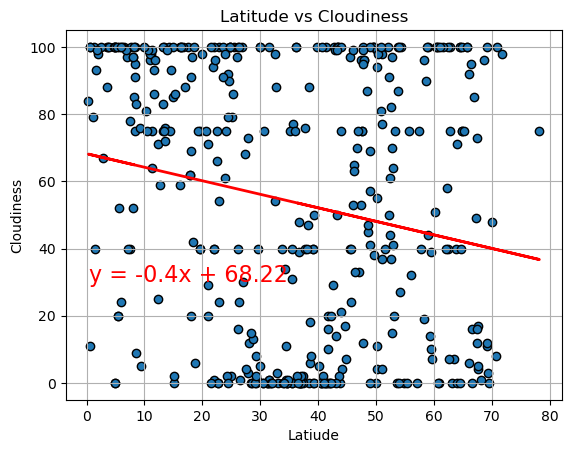

In [48]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
regress_value = (northern_hemi_df["Lat"] * slope + intercept)
plt.plot(northern_hemi_df["Lat"], regress_value, linewidth=2, color="red")
r_squared = rvalue ** 2
print (f"The r^2 value is: {r_squared}") 
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], edgecolor="black")
line_eq = (f"y = {round(slope, 2)}x + {round(intercept, 2)}")
plt.text(min(northern_hemi_df["Lat"]) * 1.1, max(northern_hemi_df["Humidity"]) * 0.3, line_eq, fontsize=16, color="red")
plt.title("Latitude vs Cloudiness")
plt.xlabel("Latiude")
plt.ylabel("Cloudiness")
plt.grid()
plt.show()

The r^2 value is: 0.005537809574047736


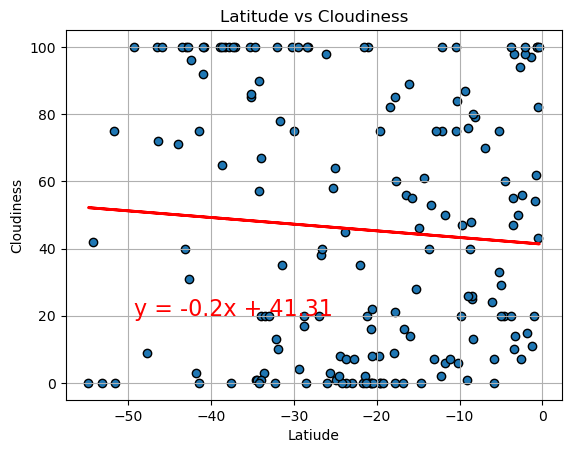

In [55]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
regress_value = (southern_hemi_df["Lat"] * slope + intercept)
plt.plot(southern_hemi_df["Lat"], regress_value, linewidth=2, color="red")
r_squared = rvalue ** 2
print (f"The r^2 value is: {r_squared}")  
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], edgecolor="black")
line_eq = line_eq = (f"y = {round(slope, 2)}x + {round(intercept, 2)}")
plt.text(min(southern_hemi_df["Lat"]) * 0.9, max(southern_hemi_df["Cloudiness"]) * 0.2, line_eq, fontsize=16, color="red")
plt.title("Latitude vs Cloudiness")
plt.xlabel("Latiude")
plt.ylabel("Cloudiness")
plt.grid()
plt.show()

The relationship between latitude and cloudiness is reminiscent of the one between latitude and humidity, there is evidence of very small or no correlation. The areas that are close to the equator have cloudiness percentages that are within an extensive range as the correlation is very small, one major factor may be what time of the year these measurements were taken. The rsquared values are both tiny with the northern hemisphere being .038 and the southern hemisphere being .0055. There is evidence of high cloudiness near the equator and low cloudiness near the equator depending on altitude, the topography of the area, the wind speeds which we touch on in the next graphs, and some other variables. 

### Wind Speed vs. Latitude Linear Regression Plot

The r^2 value is: 0.018014323071153582


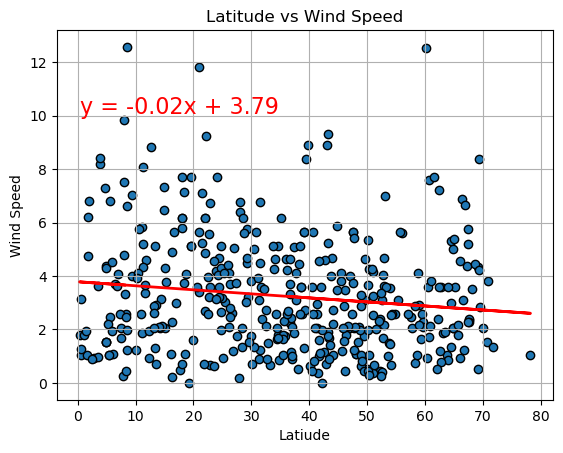

In [60]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
regress_value = (northern_hemi_df["Lat"] * slope + intercept)
plt.plot(northern_hemi_df["Lat"], regress_value, linewidth=2, color="red")
r_squared = rvalue ** 2
print (f"The r^2 value is: {r_squared}") 
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], edgecolor="black")
line_eq = (f"y = {round(slope, 2)}x + {round(intercept, 2)}")
plt.text(min(northern_hemi_df["Lat"]) * 1.1, max(northern_hemi_df["Wind Speed"]) * .8, line_eq, fontsize=16, color="red")
plt.title("Latitude vs Wind Speed")
plt.xlabel("Latiude")
plt.ylabel("Wind Speed")
plt.grid()
plt.show()

The r^2 value is: 0.02699299949340934


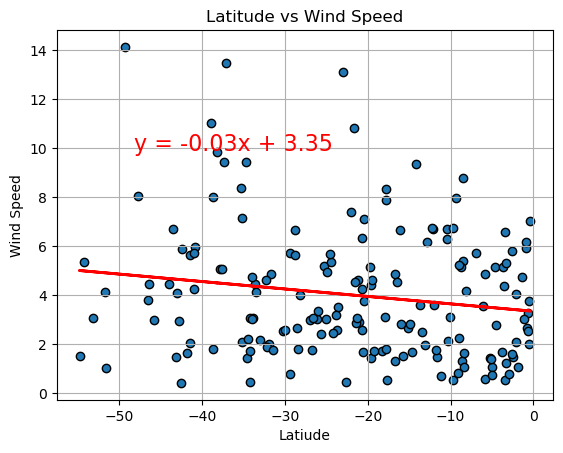

In [66]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
regress_value = (southern_hemi_df["Lat"] * slope + intercept)
plt.plot(southern_hemi_df["Lat"], regress_value, linewidth=2, color="red")
r_squared = rvalue ** 2
print (f"The r^2 value is: {r_squared}")  
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], edgecolor="black")
line_eq = line_eq = (f"y = {round(slope, 2)}x + {round(intercept, 2)}")
plt.text(min(southern_hemi_df["Lat"]) * .88, max(southern_hemi_df["Wind Speed"]) * .7, line_eq, fontsize=16, color="red")
plt.title("Latitude vs Wind Speed")
plt.xlabel("Latiude")
plt.ylabel("Wind Speed")
plt.grid()
plt.show()

The final relationship that we are took a look at deals with latitude versus wind speed. For the northern hemisphere the wind speeds tends to slightly decrease as you move farther away from the equator, while the southern hemisphere seems to somewhat decrease as you move toward the equator, as they seem to be opposites of each other. Like the other weather conditions, excluding temperature, many factors influence wind speed as the rsquared values are very low, depicting that the two variables are not dependent on each other. I have personally been in places close to and far from the equator that have very similar wind speeds, because it is determined by a multitude of factors, not just the lcoation of the city relative to the midpoint of the earth. 